In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('science')

import os, sys, time


sys.path.insert(0,"/home/nico/Tools/petsc-3.12.5/lib/petsc/bin/")
sys.path.insert(0,"/home/nico/Documents/TEAR/Codes_TEAR/se2dr/se2wave/utils/python/")
sys.path.insert(0,"/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/LibFolder")
from se2waveload import *
from Lib_GeneralFunctions import *
from GeneratePaperFigs import *
from ModelIllustration import *

In [2]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16
FontSizeControlFreak(SMALL_SIZE,MEDIUM_SIZE,BIGGER_SIZE)

In [3]:
from palettable.colorbrewer.diverging import PuOr_11_r as FieldColor

cmap = FieldColor.mpl_colormap

from matplotlib.colors import ListedColormap
import matplotlib.lines as mlines
from palettable.cartocolors.qualitative import Safe_5 as LineColor

cmapProf = ListedColormap(LineColor.mpl_colors[:])

In [7]:
StressFromPickle = LoadPickleFile("/home/nico/Documents/Documents/SharedWolfel/PaperData/220120FieldData/TEAR18_TPV3_T0_P3_025x025_A12phi65_Delta1.001_3s/Out/", "StressInAPickle")


In [24]:
from scipy.interpolate import interp2d

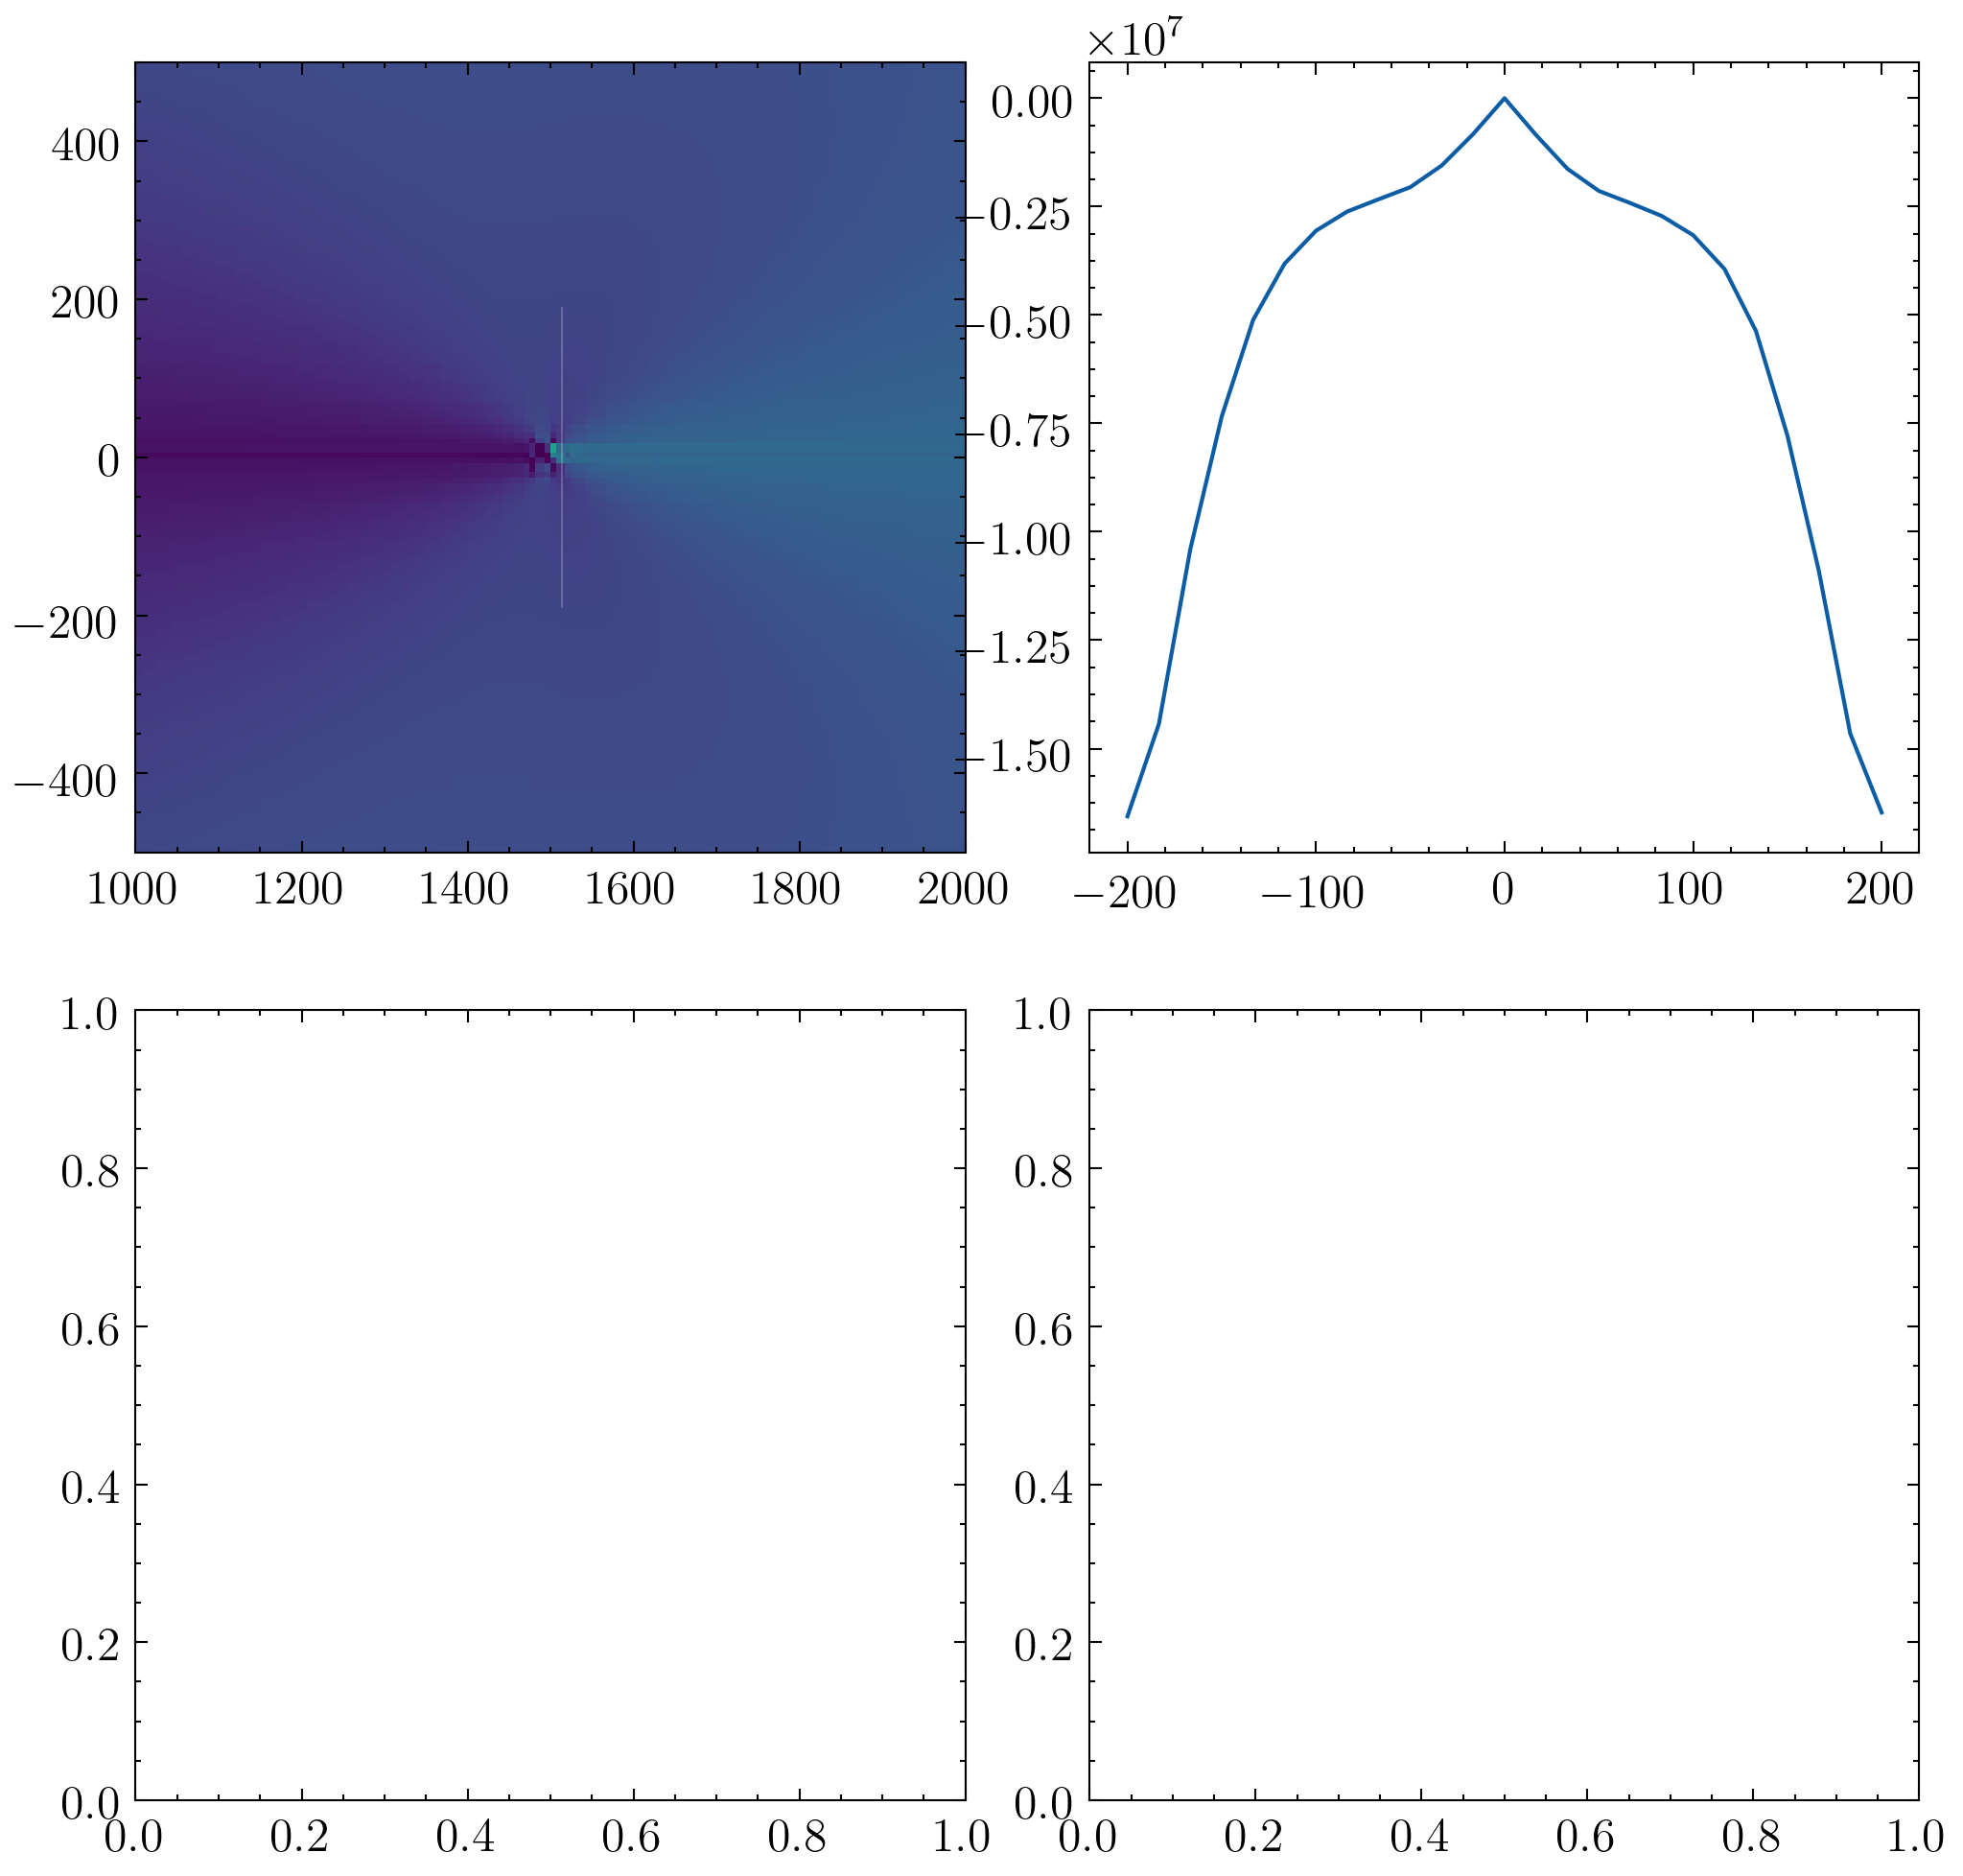

In [39]:
LocIni=[1513.8,-200]
LocEnd=[1513.8,200]

fig = plt.figure(figsize = (8, 8),dpi=300) #constrained_layout=True
gs = fig.add_gridspec(2, 2, wspace=0.15,hspace=0.2)


ax01 = fig.add_subplot(gs[0, 0])
ax02 = fig.add_subplot(gs[1, 0])

ax01Prof = fig.add_subplot(gs[0, 1])
ax02Prof = fig.add_subplot(gs[1, 1])


ax01.pcolormesh(StressFromPickle[0], StressFromPickle[1], StressFromPickle[2], shading="flat",
                          vmax = 2e7, vmin= -2e7, rasterized=True)



ax01.annotate("",   xy = (LocIni[0], LocIni[1]),
                    xycoords = 'data',
                    xytext = (LocEnd[0], LocEnd[1]), 
                    textcoords = 'data',
                    arrowprops = dict(
                        arrowstyle = "-",
                        connectionstyle = "arc3", 
                        color = 'white',
                        alpha = 1,
                        linewidth = .1
                        ),
                    )


length = 25
x, y = np.linspace(LocIni[0], LocEnd[0], length), np.linspace(LocIni[1], LocEnd[1], length)


dist = np.sqrt((LocEnd[0]- LocIni[0])*(LocEnd[0]- LocIni[0]) + (LocEnd[1]- LocIni[1])*(LocEnd[1]- LocIni[1]) )
phi = np.linspace(-dist/2, dist/2, length)

Ala= StressFromPickle[2]
zi = Ala[x.astype(np.int), y.astype(np.int)]


ax01.set_xlim([1000,2000])
ax01.set_ylim([-500,500])

ax01Prof.plot(phi,zi)

In [ ]:
StressFromPickle

In [35]:
StressFromPickle[1]

array([[-10000. , -10000. , -10000. , ..., -10000. , -10000. , -10000. ],
       [ -9993.1,  -9993.1,  -9993.1, ...,  -9993.1,  -9993.1,  -9993.1],
       [ -9981.9,  -9981.9,  -9981.9, ...,  -9981.9,  -9981.9,  -9981.9],
       ...,
       [  9981.9,   9981.9,   9981.9, ...,   9981.9,   9981.9,   9981.9],
       [  9993.1,   9993.1,   9993.1, ...,   9993.1,   9993.1,   9993.1],
       [ 10000. ,  10000. ,  10000. , ...,  10000. ,  10000. ,  10000. ]])